## TP4  Segmentation d'images

# Noms et prénoms des membres du groupe:Chaima Raach et Koussai Ghaouari

#### Importer les librairies et bibliothéques nécessaires

In [37]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.filters import threshold_otsu,threshold_multiotsu
from skimage.transform import resize
import cv2
import pandas as pd
from sklearn.cluster import KMeans
from PIL import Image, ImageDraw

I.1 **Segmentation par seuillage**

### Question:

1. Lire l’image de test 06.png,  puis afficher-là.

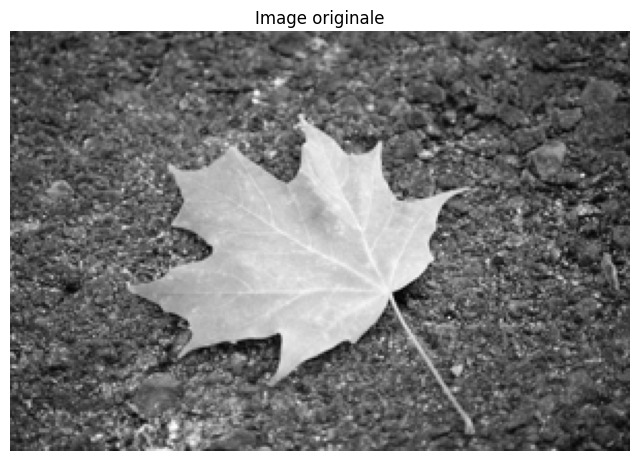

In [38]:
image = cv2.imread('06.png', cv2.COLOR_BGR2GRAY) 
plt.figure(figsize=(8, 8))
plt.imshow(image, cmap='gray')
plt.title('Image originale')
plt.axis('off')
plt.show()

2. Afficher son histogramme. Distinguer les zones séparables sur histogramme.

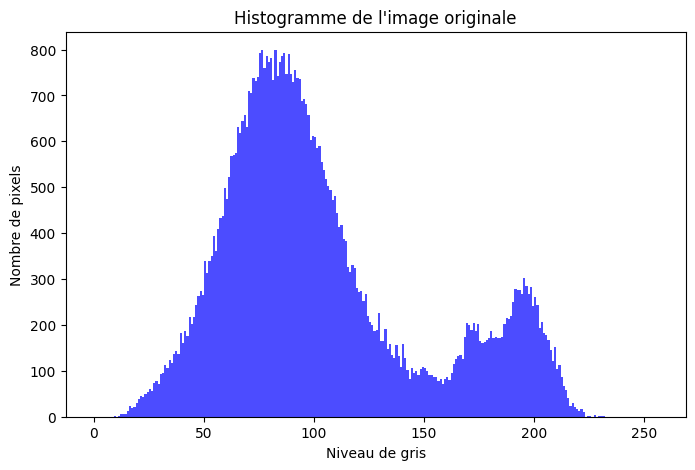

In [3]:
plt.figure(figsize=(8, 5))
plt.hist(image.ravel(), bins=256, range=[0,256], color='blue', alpha=0.7)
plt.title('Histogramme de l\'image originale')
plt.xlabel('Niveau de gris')
plt.ylabel('Nombre de pixels')
plt.show()

3. Calculer manuellement un seuil de segmentation et segmenter l'image. Afficher le résultat de segmentation.

l'histogramme montre qu'on peut séparer entre deux sous-histogrammes, avec un seuil de 150

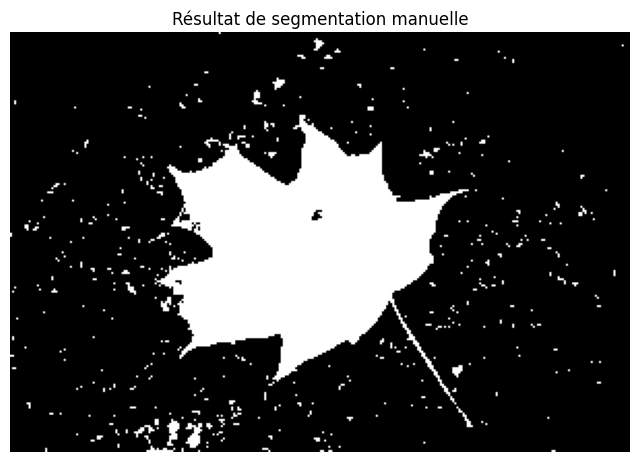

In [39]:
manual_threshold = 150
manual_segmented_image = np.where(image > manual_threshold, 255, 0)
plt.figure(figsize=(8, 8))
plt.imshow(manual_segmented_image, cmap='gray')
plt.title('Résultat de segmentation manuelle')
plt.axis('off')
plt.show()

4. Calculer le seuil avec la méthode d’Otsu et affichez le résultat de la segmentation. Comparer avec le seuillage manuel.

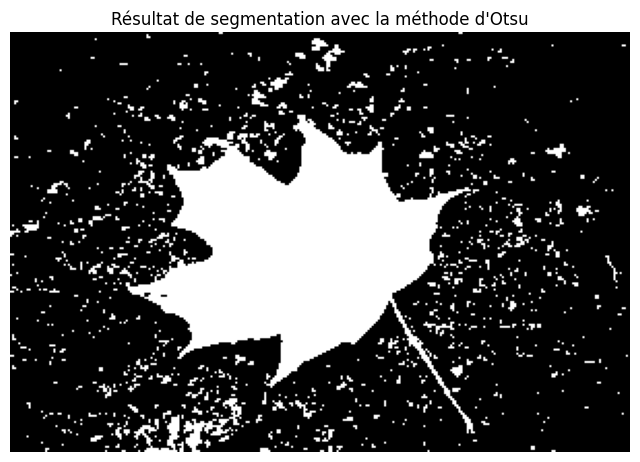

Seuil manuel: 150
Seuil Otsu: 129


In [45]:
thresh = threshold_otsu(image)
binary = np.where(image > thresh, 255, 0)

plt.figure(figsize=(8, 8))
plt.imshow(binary, cmap='gray')
plt.title('Résultat de segmentation avec la méthode d\'Otsu')
plt.axis('off')
plt.show()

print("Seuil manuel:", manual_threshold)
print("Seuil Otsu:", thresh)

I.2 **Segmentation par kmeans**

— Cette méthode vise à diviser l'image en k classes (régions) statistiquement homogènes, dont les valeurs
de niveaux de gris sont similaires au (proches du) centre (moyenne) de la classe.

— Cette similarité est estimée par calcul de distance entre la valeur du niveau de gris et du centre.

— Il faut connaitre à priori le nombre de classes (régions)

## Question:
 Lire l’image de test 11.png et appliquer l’algorithme des k-means pour segmenter l'image

(-0.5, 299.5, 195.5, -0.5)

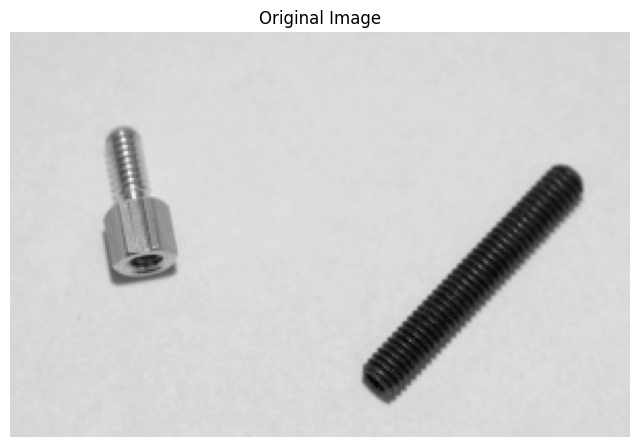

In [7]:
image = cv2.imread('11.png',cv2.COLOR_BGR2GRAY)  
plt.figure(figsize=(8, 8))
plt.imshow(image,cmap="gray")
plt.title('Original Image')
plt.axis('off')

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(-0.5, 299.5, 195.5, -0.5)

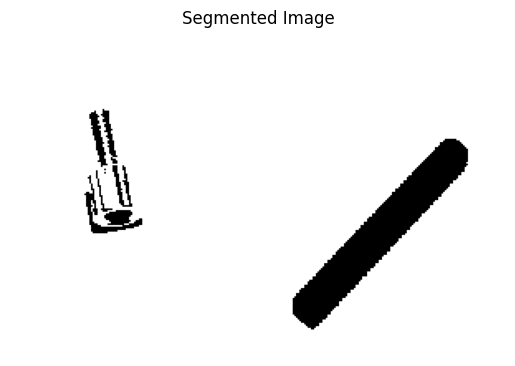

In [22]:
height, width = image.shape
X = image.reshape(height * width,1).copy()
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
clustered = kmeans.cluster_centers_[kmeans.labels_]
labels = kmeans.labels_
l=len(clustered)
for i in range(l):
    if labels[i]==0:
        clustered[i]=255
    else:
        clustered[i]=0
segmented_image=clustered.reshape(height,width)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image')
plt.axis('off')

I.3 **Segmentation par la méthode de croissance de région**

Pour segmenter une région R ayant un écart type de sigma_R.

— on commence par un point germe (seed) d’un niveau de gris donné (c’est la valeur initiale de la moyenne de R)

— puis on croit la région autour du germe, en ajoutant à la région tous les points avoisinants dont les niveaux de gris I(x; y) vérifient la condition:

|I(x; y) - mu_R|<= sigma_R, où mu_R est la moyenne de R.

— Recalculer la moyenne de R après croissance
— Réitérer les opérations 2 et 3, jusqu’à ce qu’il n’y ait plus de croissance.

Question:
1. Lire l’image mandrillgray.bmp et afficher la.
2. Choisir manuellement le point germe. Appliquer l'algorithme de croissance de région, pour segmenter une région d’écart type 0.1, autour de ce germe-là.
3. Afficher l’image segmentée sur l’image initiale

4. Essayez à présent de segmenter une région dont vous sélectionnerez le germe au moyen de la souris. Variez l’écart type. Commenter.
5. Modifier le code précédent pour segmenter 4 régions.

1- Lire l’image mandrillgray.bmp et afficher la : 

(-0.5, 511.5, 511.5, -0.5)

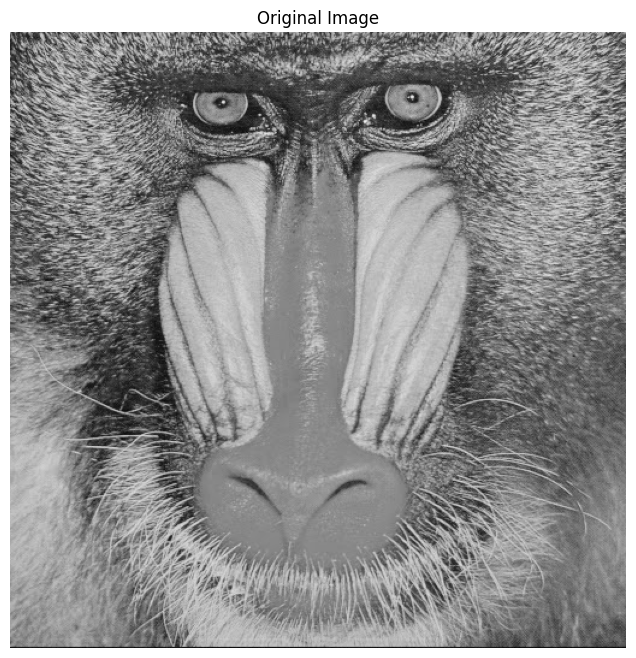

In [25]:
img = cv2.imread("mandrillgray.jpg",cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

2- Choisir manuellement le point germe. Appliquer l'algorithme de croissance de région, pour segmenter une région d’écart type 0.1, autour de ce germe-là.

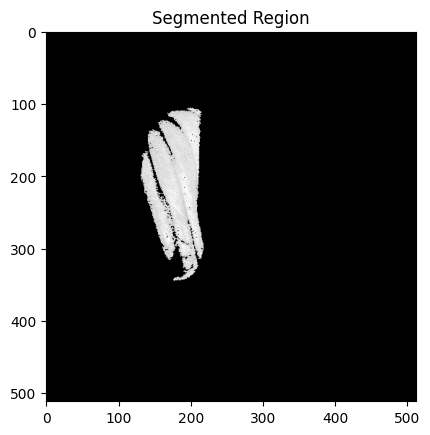

In [28]:

def region_growing(img, seed, tolerance):
    height, width = img.shape
    region = np.zeros((height, width), dtype=bool)
    stack = [seed]
    mu_R = img[seed]
    count = 1
    sigma_R = tolerance

    while stack:
        x, y = stack.pop()
        if region[x, y]:
            continue
        region[x, y] = True

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < height and 0 <= ny < width:
                if abs(int(img[nx, ny]) - mu_R) <= sigma_R:
                    stack.append((nx, ny))
                    mu_R = (mu_R * count + img[nx, ny]) / (count + 1)
                    count += 1

    return region

image = cv2.imread("mandrillgray.jpg", cv2.IMREAD_GRAYSCALE)

seed = (int(input("Enter seed x: ")), int(input("Enter seed y: ")))
region = region_growing(image, seed, tolerance=0.1 * 255)  

# Display the segmented region
segmented = image.copy()
segmented[~region] = 0
plt.imshow(segmented, cmap='gray')
plt.title("Segmented Region")
plt.show()


3- Afficher l’image segmentée sur l’image initiale

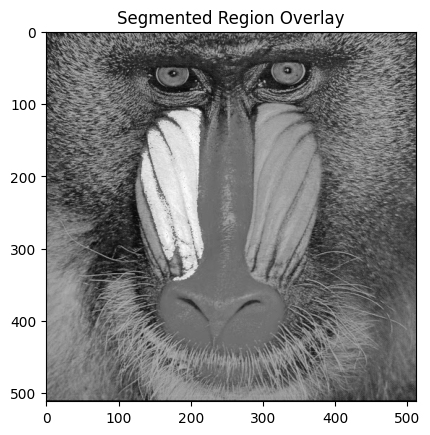

In [29]:
overlay = cv2.addWeighted(image, 0.7, segmented, 0.3, 0)
plt.imshow(overlay, cmap='gray')
plt.title("Segmented Region Overlay")
plt.show()


4- Essayez à présent de segmenter une région dont vous sélectionnerez le germe au moyen de la souris. Variez l’écart type. Commenter.

### Tolérance = 0.1

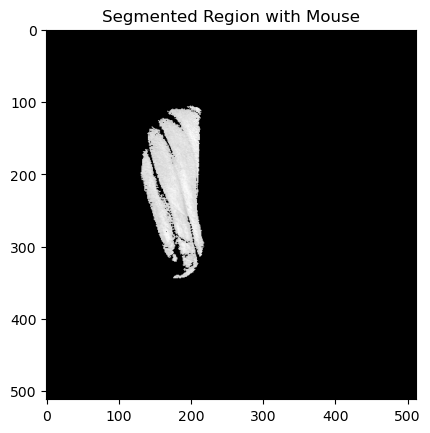

In [19]:
import cv2

def select_seed(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        param.append((y, x))  # Ajouter le point (ligne, colonne)

image = cv2.imread("mandrillgray.bmp", cv2.IMREAD_GRAYSCALE)
seed = []

cv2.imshow("Select Seed", image)
cv2.setMouseCallback("Select Seed", select_seed, seed)
cv2.waitKey(0)
cv2.destroyAllWindows()

if seed:
    region = region_growing(image, seed[0], tolerance=0.1 * 255)  
    segmented = image.copy()
    segmented[~region] = 0
    plt.imshow(segmented, cmap='gray')
    plt.title("Segmented Region with Mouse")
    plt.show()


### Tolérance = 0.01

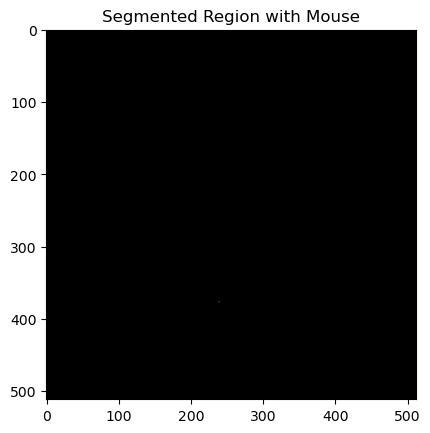

In [20]:
import cv2

def select_seed(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        param.append((y, x))  # Ajouter le point (ligne, colonne)

image = cv2.imread("mandrillgray.bmp", cv2.IMREAD_GRAYSCALE)
seed = []

cv2.imshow("Select Seed", image)
cv2.setMouseCallback("Select Seed", select_seed, seed)
cv2.waitKey(0)
cv2.destroyAllWindows()

if seed:
    region = region_growing(image, seed[0], tolerance=0.01 * 255)  
    segmented = image.copy()
    segmented[~region] = 0
    plt.imshow(segmented, cmap='gray')
    plt.title("Segmented Region with Mouse")
    plt.show()


### Tolérance = 0.2

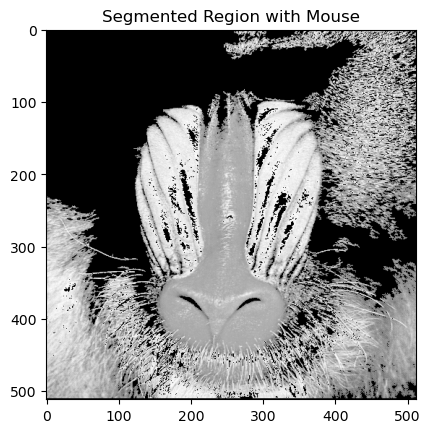

In [61]:
import cv2

def select_seed(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        param.append((y, x))  # Ajouter le point (ligne, colonne)

image = cv2.imread("mandrillgray.bmp", cv2.IMREAD_GRAYSCALE)
seed = []

cv2.imshow("Select Seed", image)
cv2.setMouseCallback("Select Seed", select_seed, seed)
cv2.waitKey(0)
cv2.destroyAllWindows()

if seed:
    region = region_growing(image, seed[0], tolerance=0.2 * 255)  
    segmented = image.copy()
    segmented[~region] = 0
    plt.imshow(segmented, cmap='gray')
    plt.title("Segmented Region with Mouse")
    plt.show()


 ### Commentaire :

L'algorithme de croissance de région est sensible à la tolérance d'écart type. Avec une tolérance faible, comme 0.01, la segmentation est stricte, isolant de petites régions homogènes autour du germe. Cette approche est utile pour des détails précis.

À l'inverse, une tolérance plus élevée, comme 0.2, crée des segments plus larges et inclusifs, adaptés aux zones plus variées. Le choix de la tolérance doit donc s'aligner sur les objectifs de la segmentation.

5- Modifier le code précédent pour segmenter 4 régions.

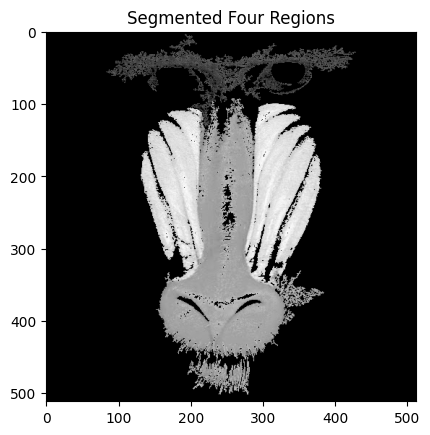

In [33]:

def region_growing_multiple(img, seeds, tolerances):
    height, width = img.shape
    combined_segmented = np.zeros((height, width), dtype=bool)
    for seed, tolerance in zip(seeds, tolerances):
        region = region_growing(img, seed, tolerance)
        combined_segmented |= region  # Fusionner les régions

    return combined_segmented

seeds = [(200, 150), (200, 350), (300, 250), (60, 250)]
tolerances = [0.1 * 255, 0.1 * 255, 0.1 * 255, 0.1 * 255]

combined_segmented = region_growing_multiple(image, seeds, tolerances)
segmented_image = image.copy()
segmented_image[~combined_segmented] = 0
plt.imshow(segmented_image, cmap='gray')
plt.title("Segmented Four Regions")
plt.show()


II- **Application des méthodes de segmentation sur les images du dossier Dataset**

II-1 Chargement et visualisation des images

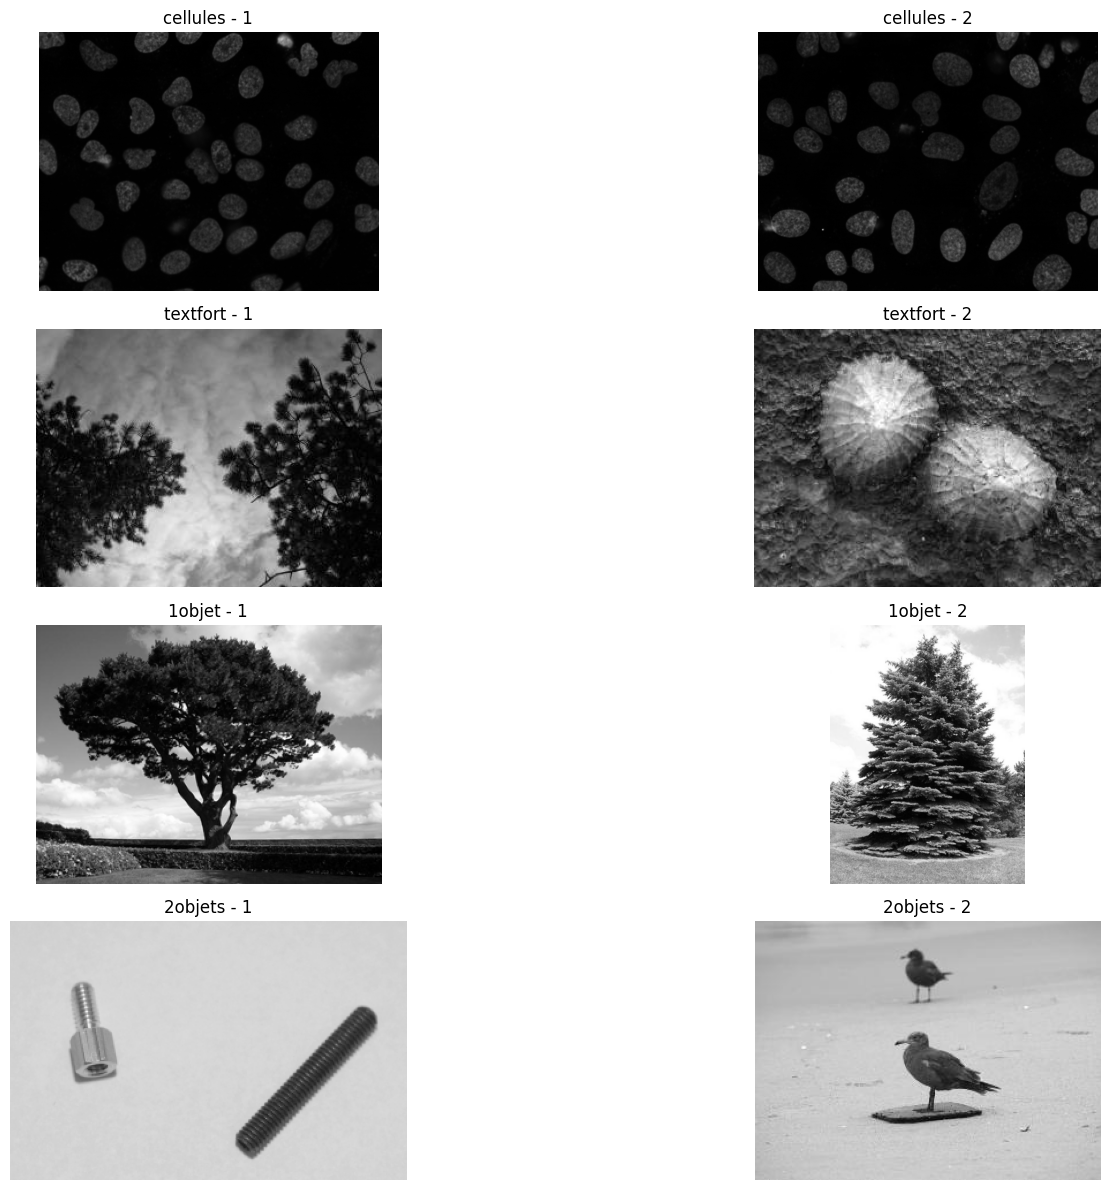

In [195]:
import os
import cv2
import matplotlib.pyplot as plt

def load_images_from_folder(folder, count=4):
    images = []
    filenames = sorted(os.listdir(folder))[:count]  # Use sorted to keep order consistent
    for filename in filenames:
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

categories = ["cellules", "textfort", "1objet", "2objets"]
dataset_folder = "Datasets/images"
num_images = 2

fig, axes = plt.subplots(len(categories), num_images, figsize=(18, 12))

for i, category in enumerate(categories):
    folder = os.path.join(dataset_folder, category)
    images = load_images_from_folder(folder, count=num_images)
    for j, img in enumerate(images):

        img_gray = cv2.cvtColor(img,cv2.IMREAD_GRAYSCALE)
        axes[i, j].imshow(img_gray,cmap="gray")
        axes[i, j].axis('off')
        axes[i, j].set_title(f'{category} - {j+1}')

plt.tight_layout()
plt.show()


II-2 Choix des méthodes de segmentation
- **Otsu thresholding** 
- **Kmeans**
- **Croissance de région**

In [158]:
def manual_thresholding(image, threshold):
    segmented_image = np.where(image > threshold, 0, 255)
    return segmented_image

# Function for Otsu's thresholding
def otsu_thresholding(image):
    threshold = threshold_otsu(image)
    image = np.where(image > threshold, 0, 255)
    return image

# Function for k-means segmentation
def kmeans_segmentation(image, k=2):
    height, width = image.shape
    X = image.reshape(height * width,1).copy()
    kmeans = KMeans(n_clusters=2,n_init="auto",random_state=42)
    kmeans.fit(X)
    clustered = kmeans.cluster_centers_[kmeans.labels_]
    labels = kmeans.labels_
    l=len(clustered)
    for i in range(l):
        if labels[i]==0:
            clustered[i]=255
        else:
            clustered[i]=0
    segmented_image=clustered.reshape(height,width)
    return segmented_image



# Function for region growing with inversion
def region_growing(img, seed, tolerance):
    height, width = img.shape
    region = np.zeros((height, width), dtype=bool)
    stack = [seed]
    mu_R = img[seed]
    count = 1

    while stack:
        x, y = stack.pop()
        if not region[x, y]:
            region[x, y] = True
            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                nx, ny = x + dx, y + dy
                if 0 <= nx < height and 0 <= ny < width:
                    if abs(int(img[nx, ny]) - mu_R) <= tolerance:
                        stack.append((nx, ny))
                        mu_R = (mu_R * count + img[nx, ny]) / (count + 1)
                        count += 1

    # Return the region as is, True for region, False for background
    return region

II-3.Choix des métriques d'évaluation

les métriques de performances se basent toutes sur les 4 notions suivantes : TP , FP , FN , TN
1. **Précision (Precision)** :  
   La précision mesure la proportion d'instances correctement identifiées parmi les instances que le modèle a prédites comme positives. En d'autres termes, c'est le nombre de vrais positifs (tp) divisé par le nombre total de prédictions positives (tp + fp). Une haute précision signifie que le modèle a moins de faux positifs.

2. **Rappel (Recall)** :  
   Le rappel mesure la proportion d'instances correctement identifiées parmi toutes les instances réellement positives. C'est le nombre de vrais positifs (tp) divisé par le nombre total d'instances réellement positives (tp + fn). Un rappel élevé signifie que le modèle a moins de faux négatifs.

3. **F1-score (F1-score)** :  
   Le F1-score est la moyenne pondérée de la précision et du rappel. Il prend en compte à la fois les faux positifs et les faux négatifs. C'est une mesure de précision globale du modèle. Il est calculé en utilisant la formule : 2 * (precision * recall) / (precision + recall).

4. **Exactitude (Accuracy)** :  
   L'exactitude mesure la proportion d'instances correctement identifiées parmi toutes les instances. C'est le nombre de vrais positifs (tp) et de vrais négatifs (tn) divisé par le nombre total d'instances (tp + tn + fp + fn). L'exactitude est sensible aux proportions de classes dans les données.

5. **Intersection sur Union (IoU)** :  
   L'Intersection sur Union, également appelée Jaccard Index, est une mesure de similarité entre deux ensembles. Dans le contexte de l'évaluation de la segmentation d'images ou de la détection d'objets, IoU mesure la superposition entre la vérité terrain et les prédictions du modèle. C'est le rapport entre la taille de l'intersection et la taille de l'union des deux ensembles.

6. **Indice Dice (Dice Score)** :  
   L'indice Dice est également une mesure de similarité souvent utilisée pour l'évaluation de la segmentation d'images ou de la détection d'objets. Il mesure la superposition entre la vérité terrain et les prédictions du modèle, en prenant en compte à la fois la taille de l'intersection et la taille des ensembles individuels.

In [92]:
def compute_metrics(ground_truth, prediction):
    if ground_truth.shape != prediction.shape:
        prediction = cv2.resize(prediction, (ground_truth.shape[1], ground_truth.shape[0]))

    # Try adaptive thresholding or check the histogram to set this threshold
    threshold_gt = 128  # Adjust this as needed
    threshold_pred = 100  # Adjust this as needed

    # Inverting the logic if necessary by changing '>' to '<='
    ground_truth_binary = (ground_truth > threshold_gt).astype(np.uint8)
    prediction_binary = (prediction > threshold_pred).astype(np.uint8)

    tp = np.sum((ground_truth_binary == 1) & (prediction_binary == 1))
    fp = np.sum((ground_truth_binary == 0) & (prediction_binary == 1))
    fn = np.sum((ground_truth_binary == 1) & (prediction_binary == 0))
    tn = np.sum((ground_truth_binary == 0) & (prediction_binary == 0))

    precision = tp / (tp + fp) if tp + fp > 0 else 0
    recall = tp / (tp + fn) if tp + fn > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0
    accuracy = (tp + tn) / (tp + tn + fp + fn) if tp + tn + fp + fn > 0 else 0
    iou = tp / (tp + fp + fn) if tp + fp + fn > 0 else 0
    dice = 2 * tp / (2 * tp + fp + fn) if 2 * tp + fp + fn > 0 else 0

    print(f"TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}")
    return {
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Accuracy": accuracy,
        "IoU": iou,
        "Dice": dice
    }


In [190]:
def evaluate_segmentation(img_path, ground_truth_path):
    # Load the image and ground truth
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    ground_truth = cv2.imread(ground_truth_path, cv2.IMREAD_GRAYSCALE)
    ground_truth=manual_thresholding(ground_truth,1)

    # Apply segmentation methods
    segmentation_methods = ["otsu_threshold", "kmeans", "region_growing"]
    segmented_images = {"otsu_threshold": None, "kmeans": None, "region_growing": None}
    for method in segmentation_methods:

        if method == "otsu_threshold":
            segmented_images[method] = otsu_thresholding(img)
        elif method == "kmeans":
            segmented_images[method] =kmeans_segmentation(img, k=2)
        elif method == "region_growing":
            seed = (img.shape[0] // 2, img.shape[1] // 2)
            tolerance = 0.1 * 255
            region = region_growing(img, seed, tolerance)
            segmented_image = img.copy()
            segmented_image[region] = 255
            segmented_image[~region] = 0 
            segmented_images[method] =255-segmented_image
    metrics_data = []
    for method, segmented_image in segmented_images.items():
        fig, ax = plt.subplots(1, 2, figsize=(18, 6))

        # Plot ground truth
        ax[0].imshow(ground_truth, cmap='gray')
        ax[0].set_title("Ground Truth")
        ax[0].axis('off')

        # Plot segmented image
        ax[1].imshow(segmented_image, cmap='gray')
        ax[1].set_title(f"Segmented Image ({method})")
        ax[1].axis('off')

        # Plot metrics table
        metrics = compute_metrics(ground_truth, segmented_image)
        metrics_data.append({"Method": method, **metrics})
    
    
    # Convert metrics data to DataFrame
    metrics_df = pd.DataFrame(metrics_data)
    plt.show()
    return metrics_df

## Dossier 1objet

### Image 0.1

TP: 33862, FP: 3742, FN: 3377, TN: 26519
TP: 33862, FP: 3742, FN: 3377, TN: 26519
TP: 15498, FP: 0, FN: 21741, TN: 30261


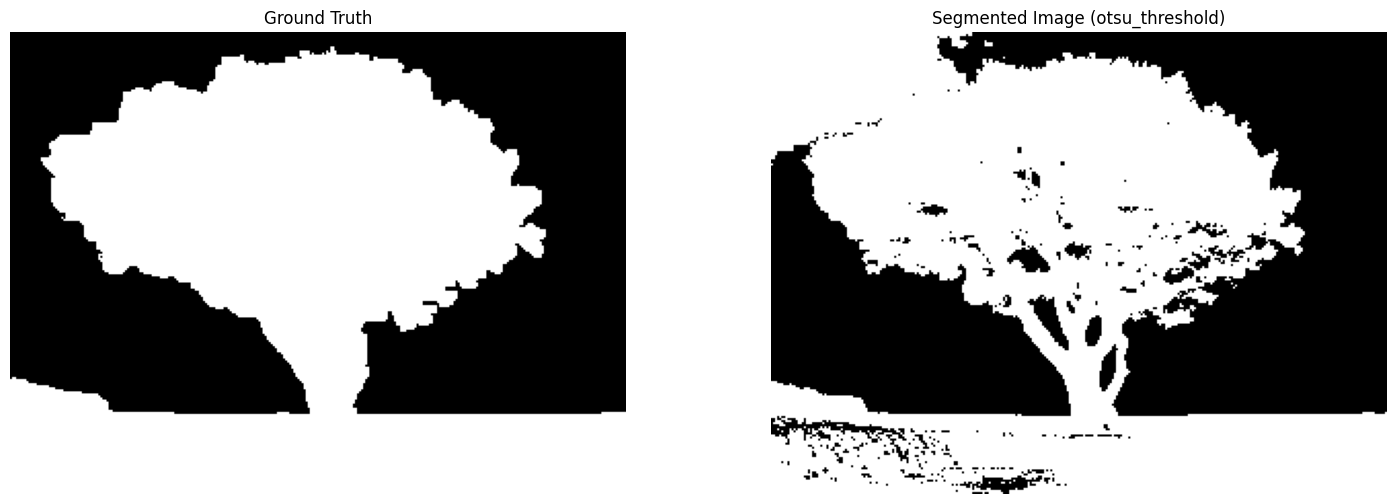

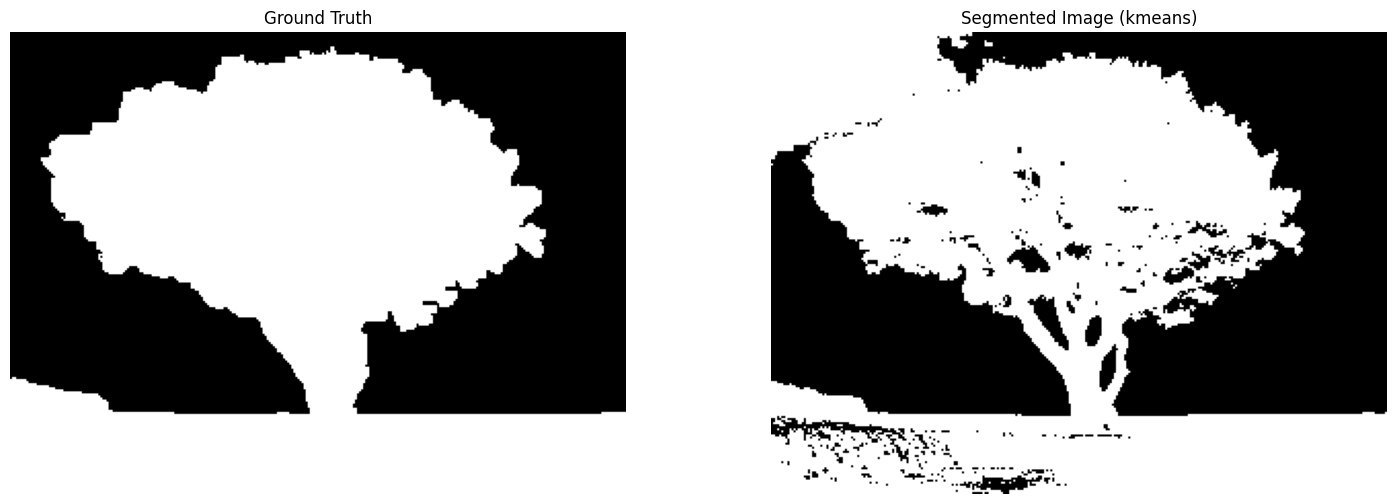

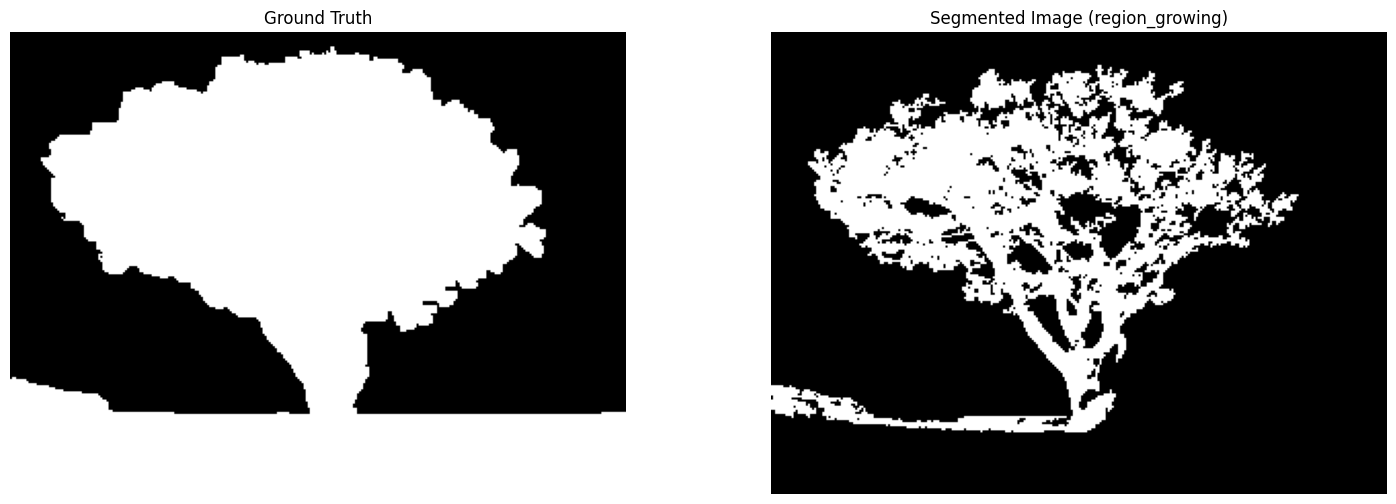

In [164]:
metrics_df=evaluate_segmentation("Datasets/images/1objet/01.png","Datasets/verite_terrain/1objet/01v.png")

In [165]:
metrics_df

Method  Precision    Recall  F1 Score  Accuracy       IoU      Dice
0  otsu_threshold   0.900489  0.909316  0.904881  0.894533  0.826285  0.904881
1          kmeans   0.900489  0.909316  0.904881  0.894533  0.826285  0.904881
2  region_growing   1.000000  0.416177  0.587747  0.677911  0.416177  0.587747

### Image 0.2

TP: 47400, FP: 6909, FN: 9687, TN: 56004
TP: 47400, FP: 6909, FN: 9687, TN: 56004
TP: 9697, FP: 56, FN: 47390, TN: 62857


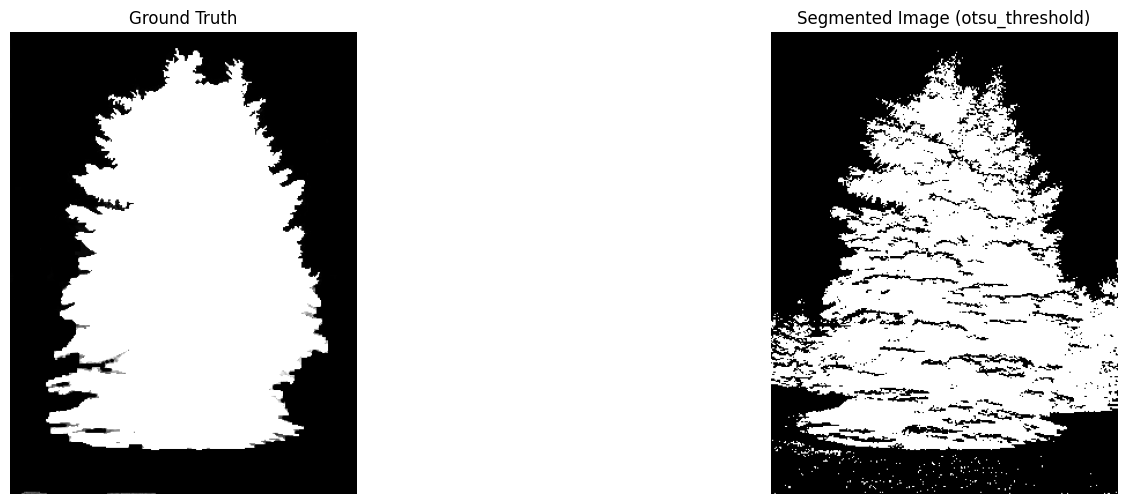

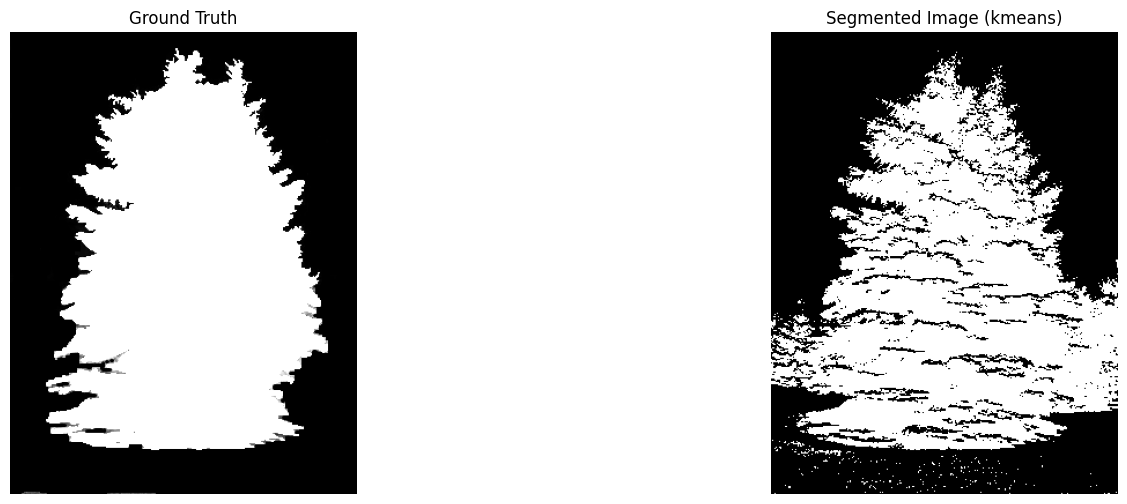

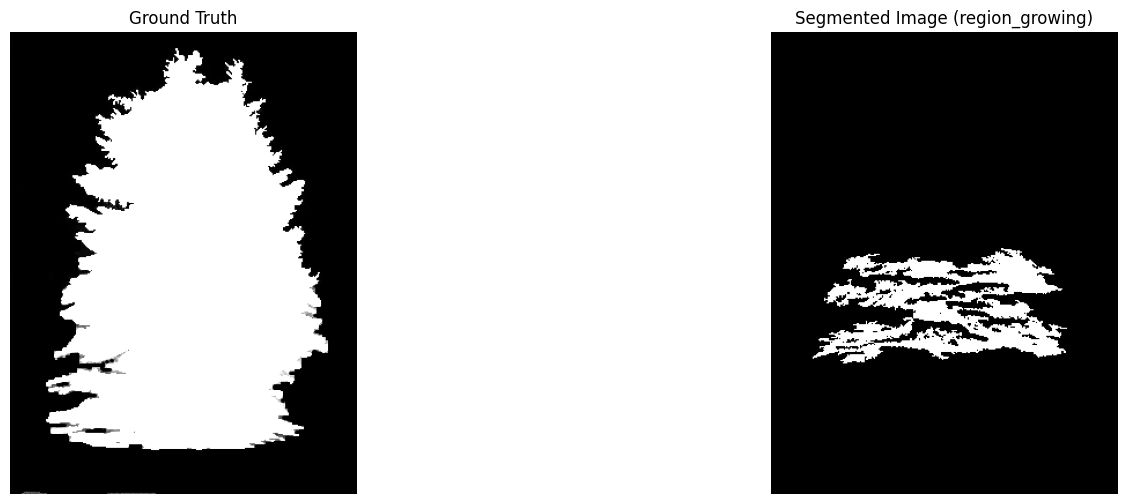

In [167]:
metrics_df=evaluate_segmentation("Datasets/images/1objet/02.png","Datasets/verite_terrain/1objet/02v.png")

In [169]:
metrics_df

Method  Precision    Recall  F1 Score  Accuracy       IoU      Dice
0  otsu_threshold   0.872784  0.830312  0.851018  0.861700  0.740671  0.851018
1          kmeans   0.872784  0.830312  0.851018  0.861700  0.740671  0.851018
2  region_growing   0.994258  0.169864  0.290156  0.604617  0.169697  0.290156

## Dossier 2objest

### Image 11

TP: 3800, FP: 67, FN: 1323, TN: 53610
TP: 3843, FP: 70, FN: 1280, TN: 53607
TP: 5023, FP: 298, FN: 100, TN: 53379


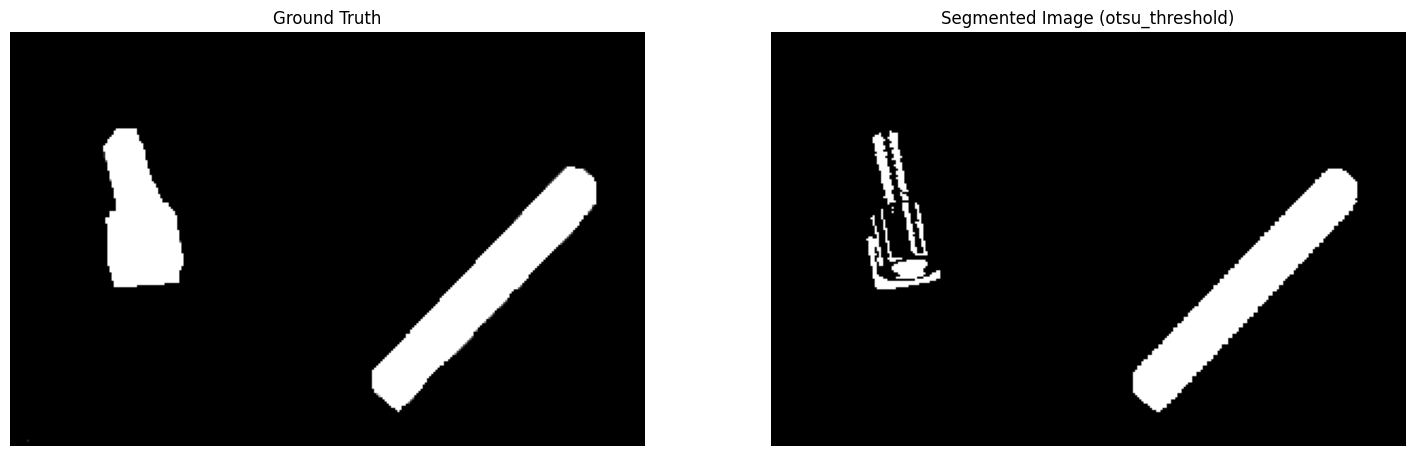

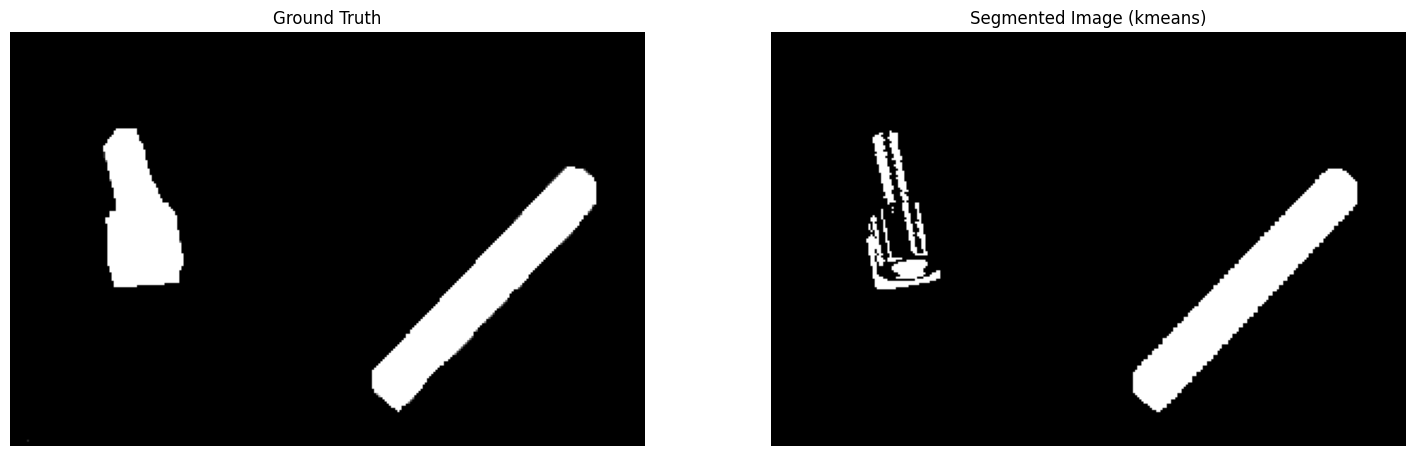

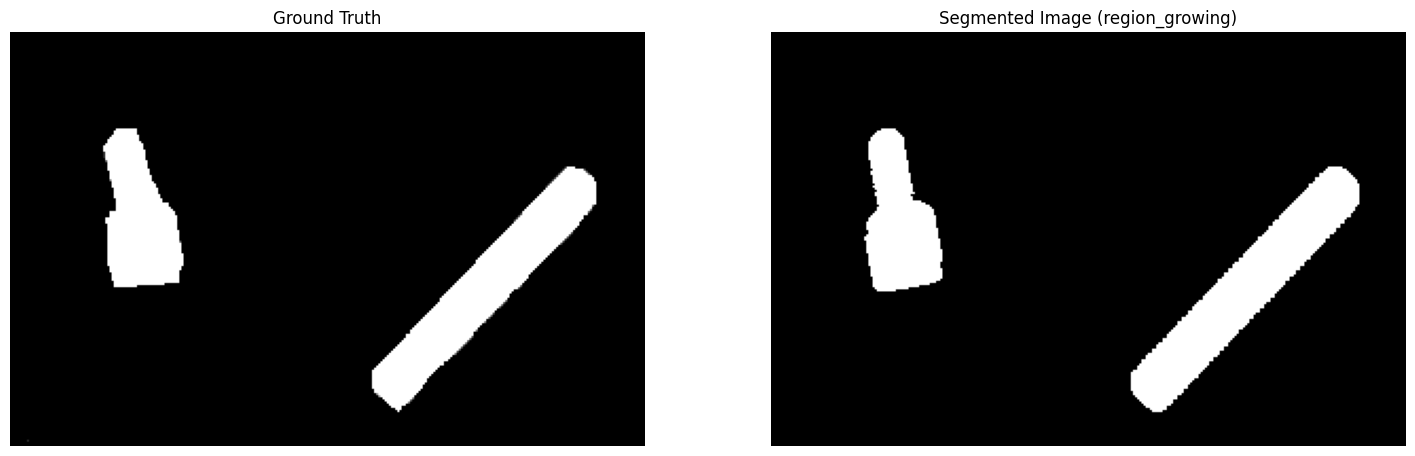

In [172]:
metrics_df=evaluate_segmentation("Datasets/images/2objets/11.png","Datasets/verite_terrain/2objets/11v.png")

In [173]:
metrics_df

Method  Precision    Recall  F1 Score  Accuracy       IoU      Dice
0  otsu_threshold   0.982674  0.741753  0.845384  0.976361  0.732177  0.845384
1          kmeans   0.982111  0.750146  0.850598  0.977041  0.740035  0.850598
2  region_growing   0.943995  0.980480  0.961892  0.993231  0.926582  0.961892

### Image 12

TP: 3567, FP: 56, FN: 730, TN: 63147
TP: 3567, FP: 56, FN: 730, TN: 63147
TP: 1345, FP: 8, FN: 2952, TN: 63195


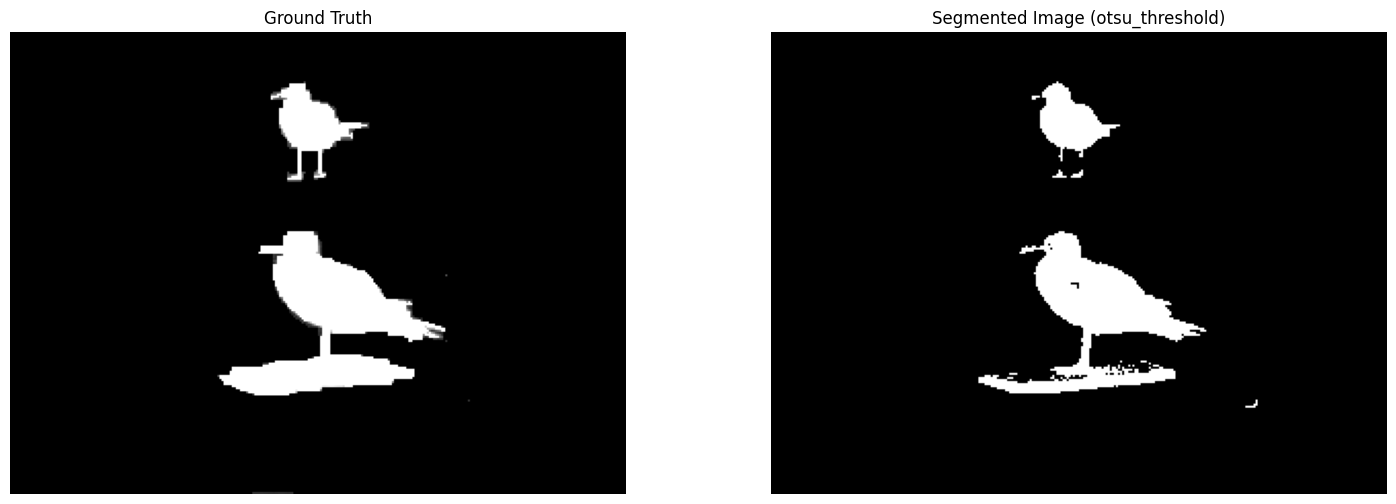

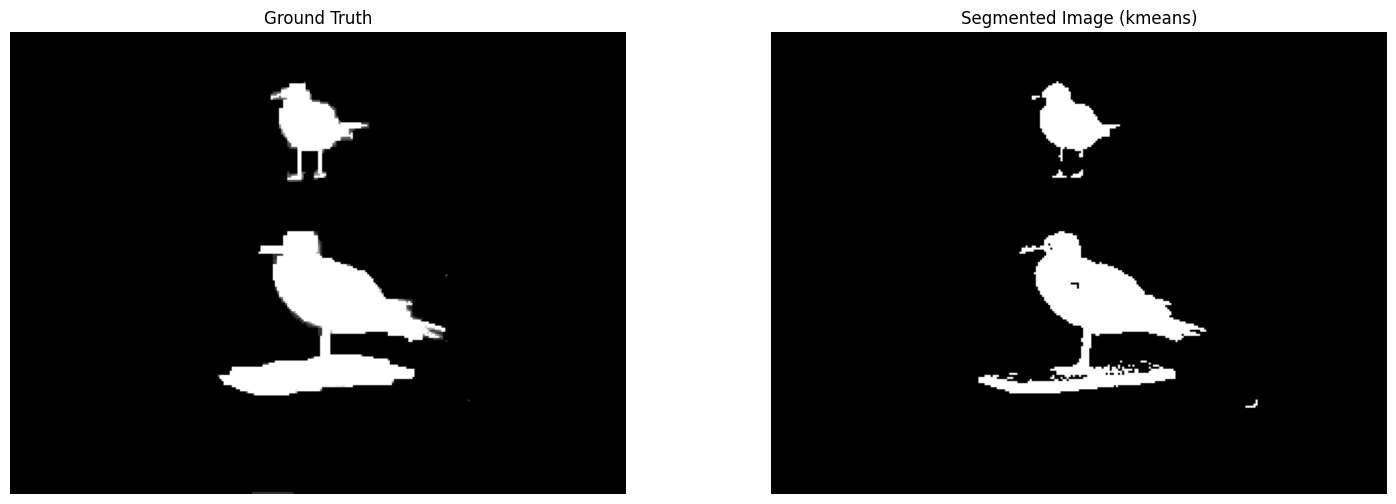

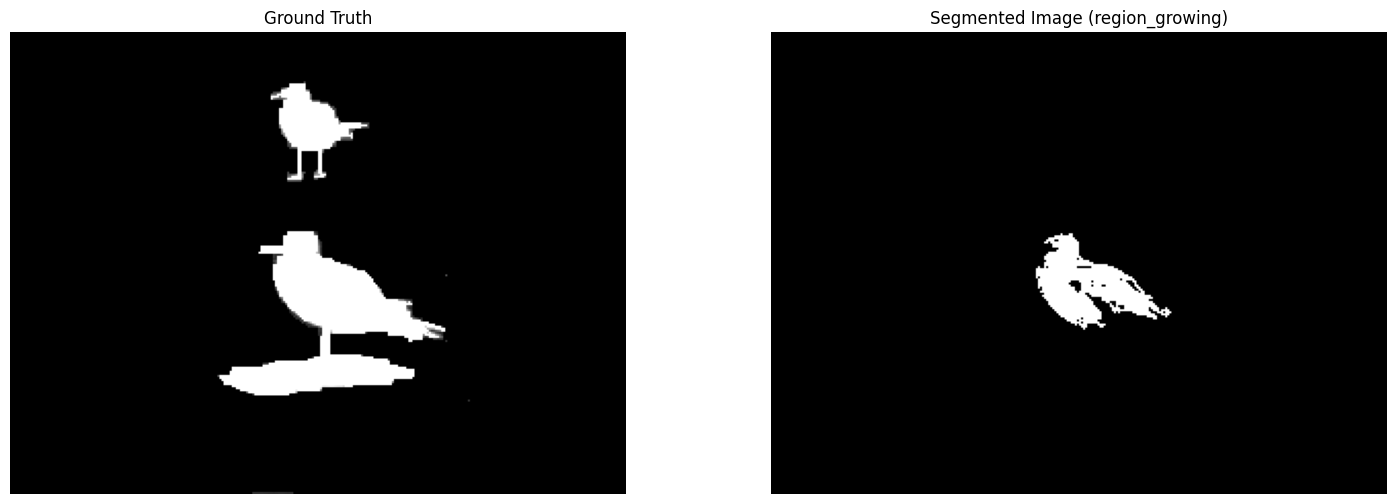

In [176]:
metrics_df=evaluate_segmentation("Datasets/images/2objets/12.png","Datasets/verite_terrain/2objets/12v.png")

In [177]:
metrics_df

Method  Precision    Recall  F1 Score  Accuracy       IoU      Dice
0  otsu_threshold   0.984543  0.830114  0.900758  0.988356  0.819435  0.900758
1          kmeans   0.984543  0.830114  0.900758  0.988356  0.819435  0.900758
2  region_growing   0.994087  0.313009  0.476106  0.956148  0.312427  0.476106

## Dossier Cellules

### dna-0

TP: 1012034, FP: 39476, FN: 11625, TN: 326335
TP: 1012385, FP: 44040, FN: 11274, TN: 321771
TP: 1013949, FP: 98726, FN: 9710, TN: 267085


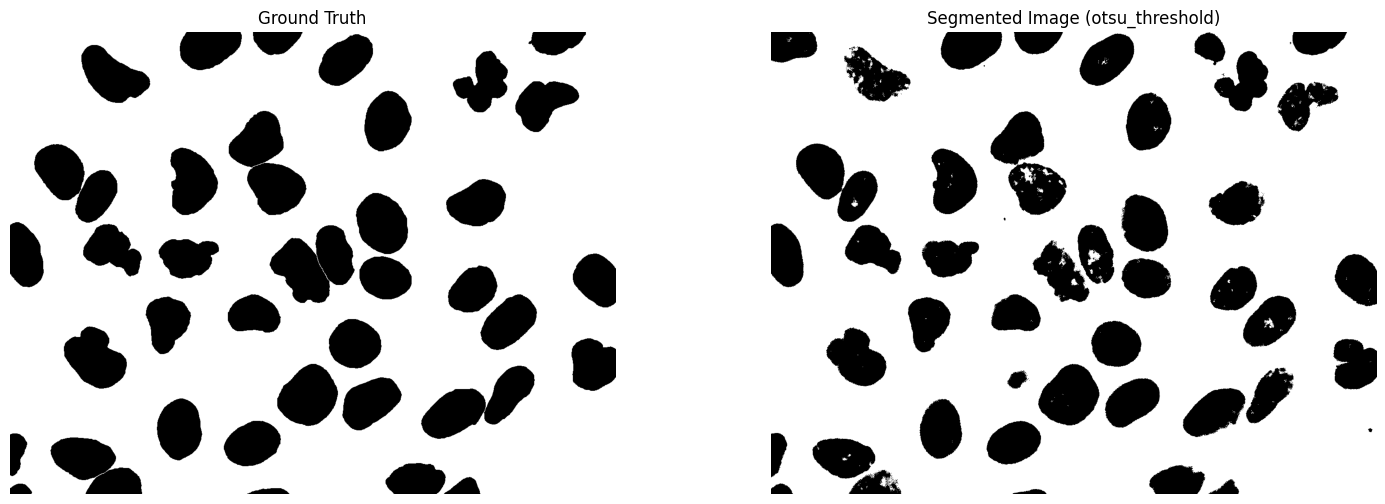

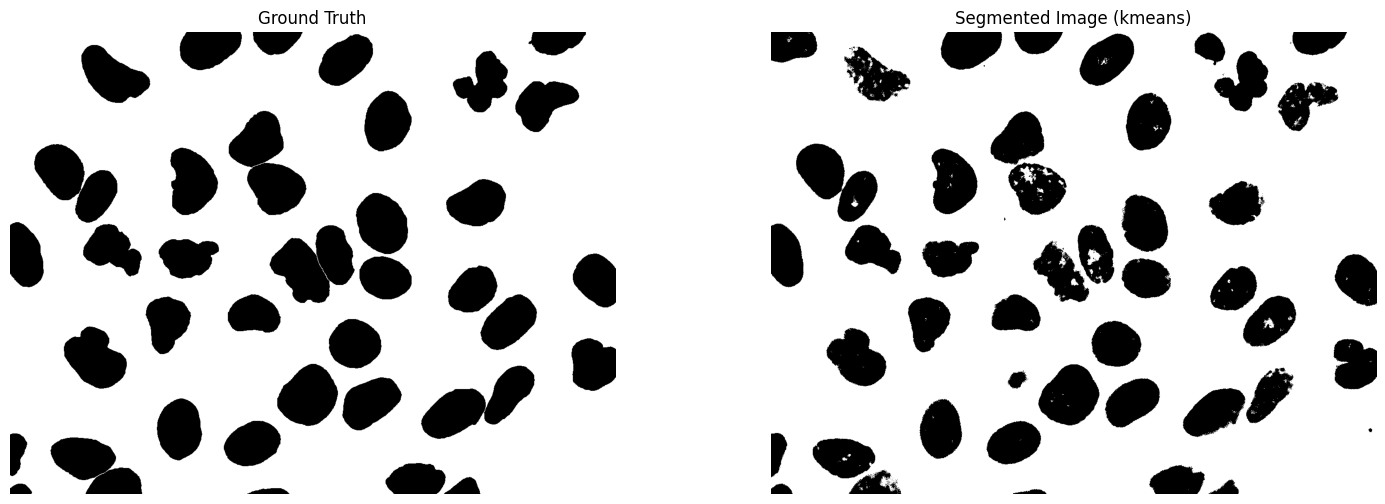

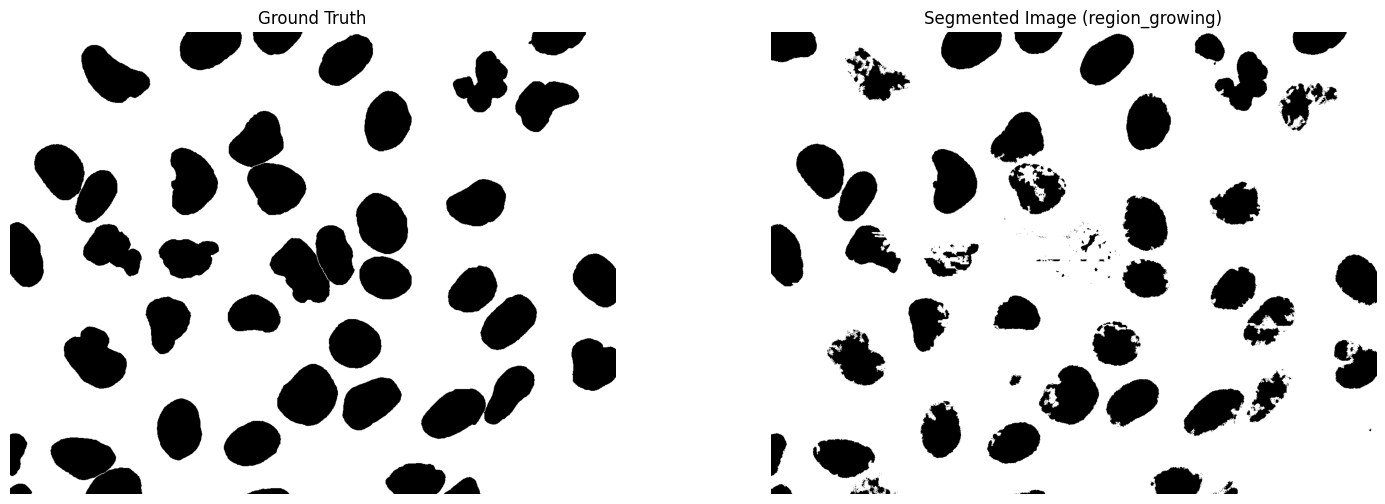

In [179]:
metrics_df=evaluate_segmentation("Datasets/images/cellules/dna-0.png","Datasets/verite_terrain/Cellules/dna-0.png")

In [180]:
metrics_df

Method  Precision    Recall  F1 Score  Accuracy       IoU      Dice
0  otsu_threshold   0.962458  0.988644  0.975375  0.963223  0.951934  0.975375
1          kmeans   0.958312  0.988987  0.973408  0.960191  0.948193  0.973408
2  region_growing   0.911271  0.990514  0.949242  0.921959  0.903388  0.949242

### dna-1

TP: 1022312, FP: 59222, FN: 13230, TN: 294706
TP: 1022312, FP: 59222, FN: 13230, TN: 294706
TP: 1025445, FP: 90289, FN: 10097, TN: 263639


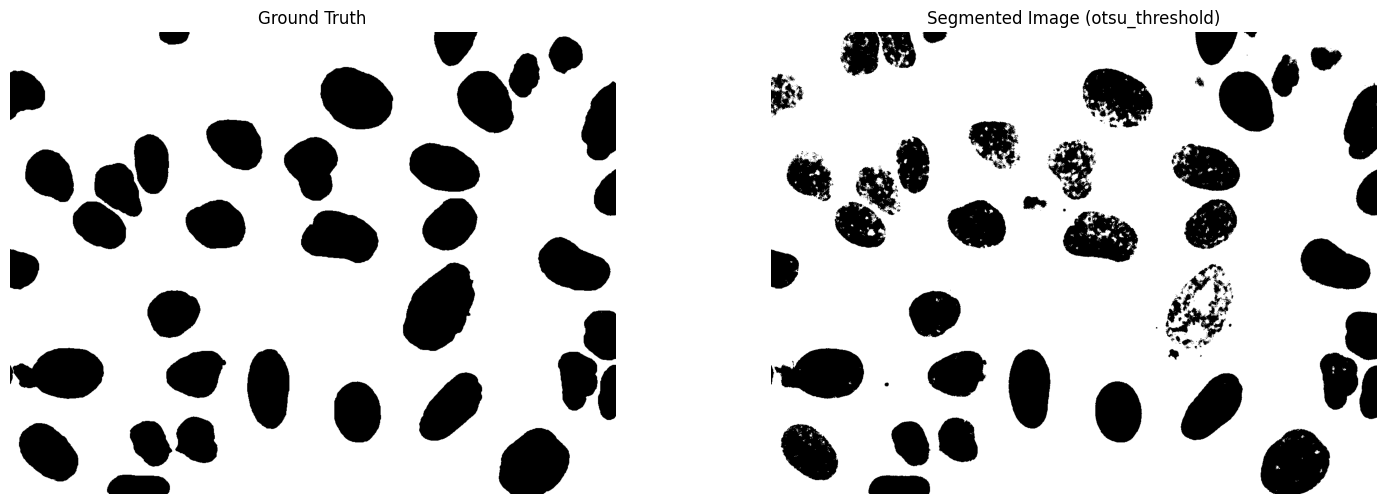

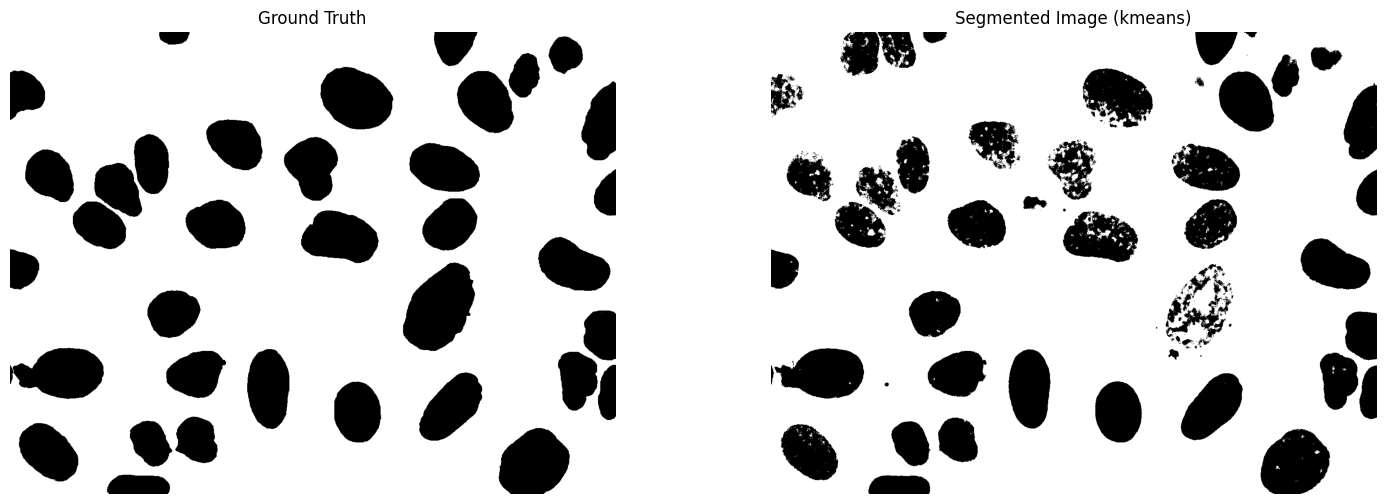

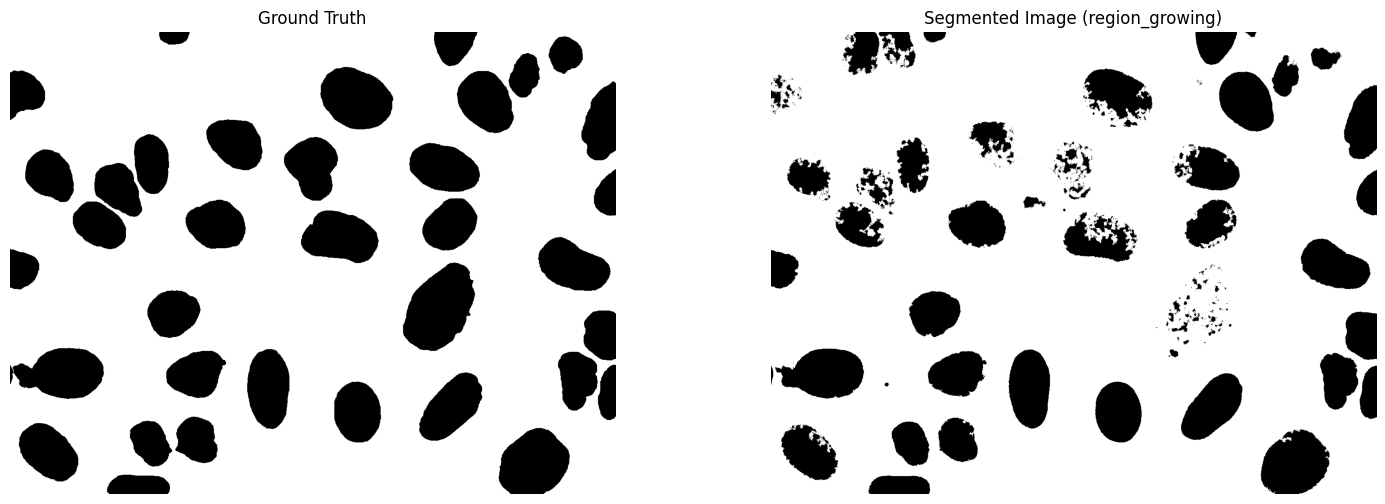

In [184]:
metrics_df=evaluate_segmentation("Datasets/images/cellules/dna-1.png","Datasets/verite_terrain/Cellules/dna-1.png")

In [185]:
metrics_df

Method  Precision    Recall  F1 Score  Accuracy       IoU      Dice
0  otsu_threshold   0.945243  0.987224  0.965777  0.947856  0.933820  0.965777
1          kmeans   0.945243  0.987224  0.965777  0.947856  0.933820  0.965777
2  region_growing   0.919077  0.990250  0.953337  0.927752  0.910834  0.953337

## Dossier Textfort

### Image 21

TP: 29436, FP: 908, FN: 4088, TN: 33068
TP: 29501, FP: 960, FN: 4023, TN: 33016
TP: 228, FP: 8078, FN: 33296, TN: 25898


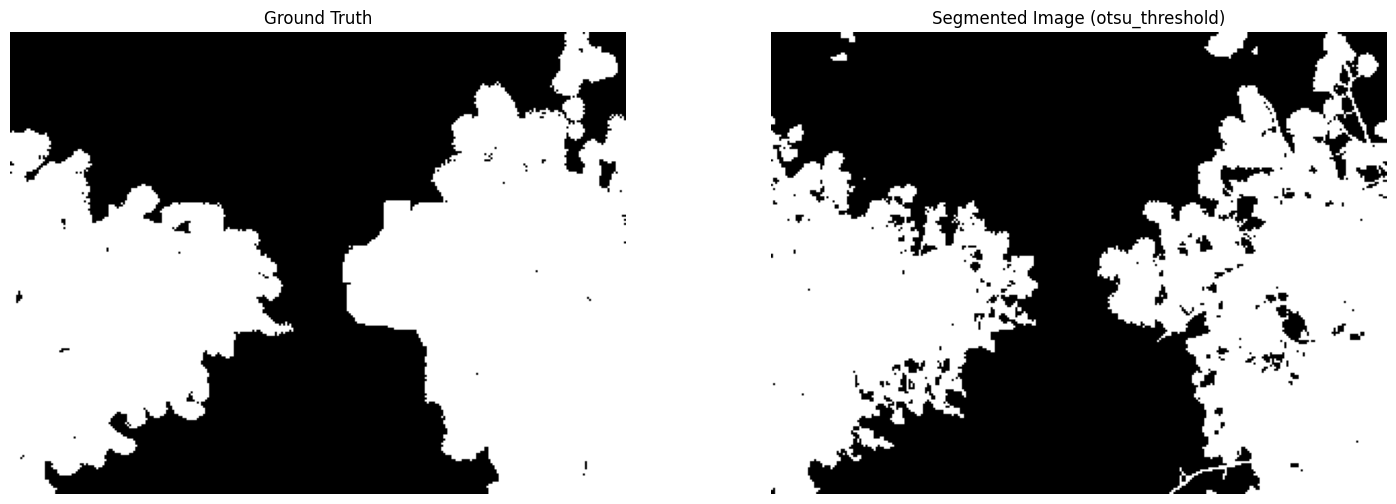

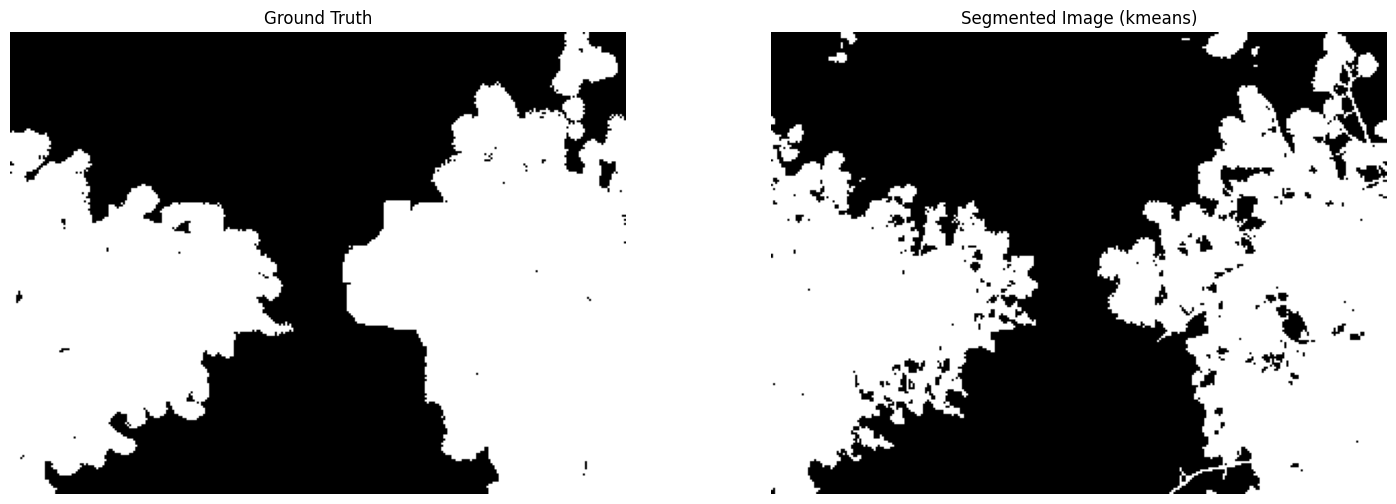

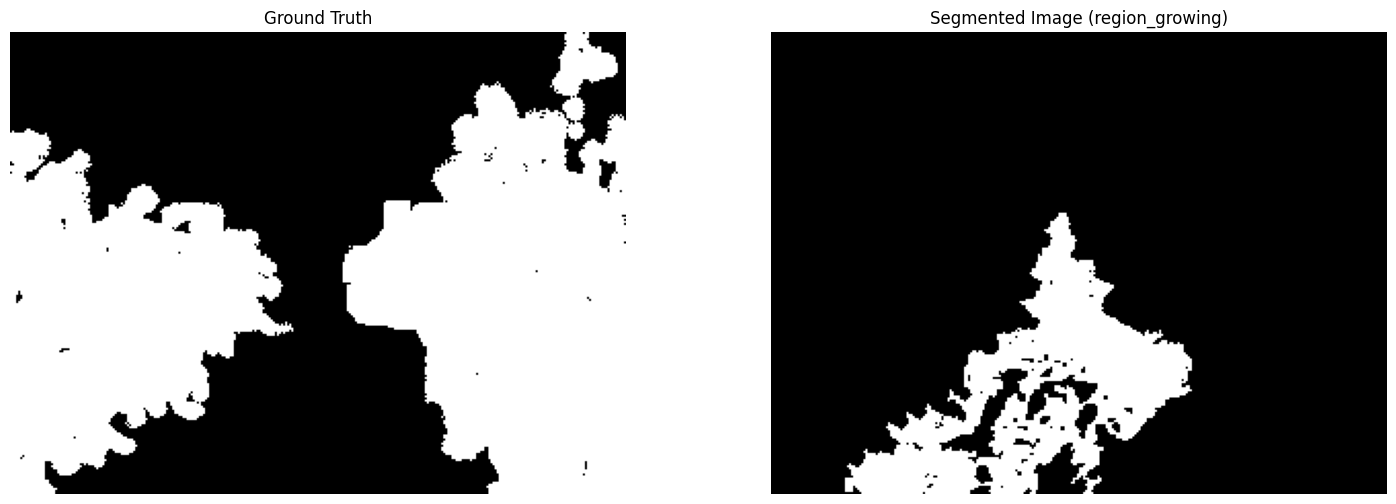

In [187]:
metrics_df=evaluate_segmentation("Datasets/images/textfort/21.png","Datasets/verite_terrain/textfort/21v.png")

In [188]:
metrics_df

Method  Precision    Recall  F1 Score  Accuracy       IoU      Dice
0  otsu_threshold   0.970076  0.878058  0.921776  0.925985  0.854902  0.921776
1          kmeans   0.968484  0.879996  0.922122  0.926178  0.855498  0.922122
2  region_growing   0.027450  0.006801  0.010901  0.387052  0.005481  0.010901

TP: 52986, FP: 864, FN: 2392, TN: 10958
TP: 52986, FP: 864, FN: 2392, TN: 10958
TP: 53558, FP: 11248, FN: 1820, TN: 574


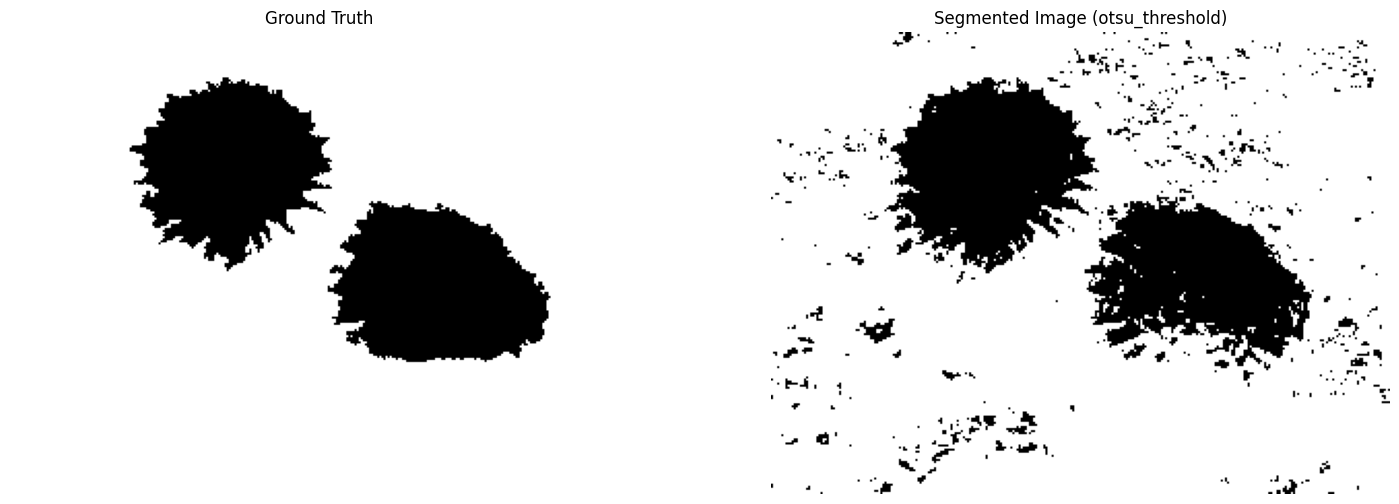

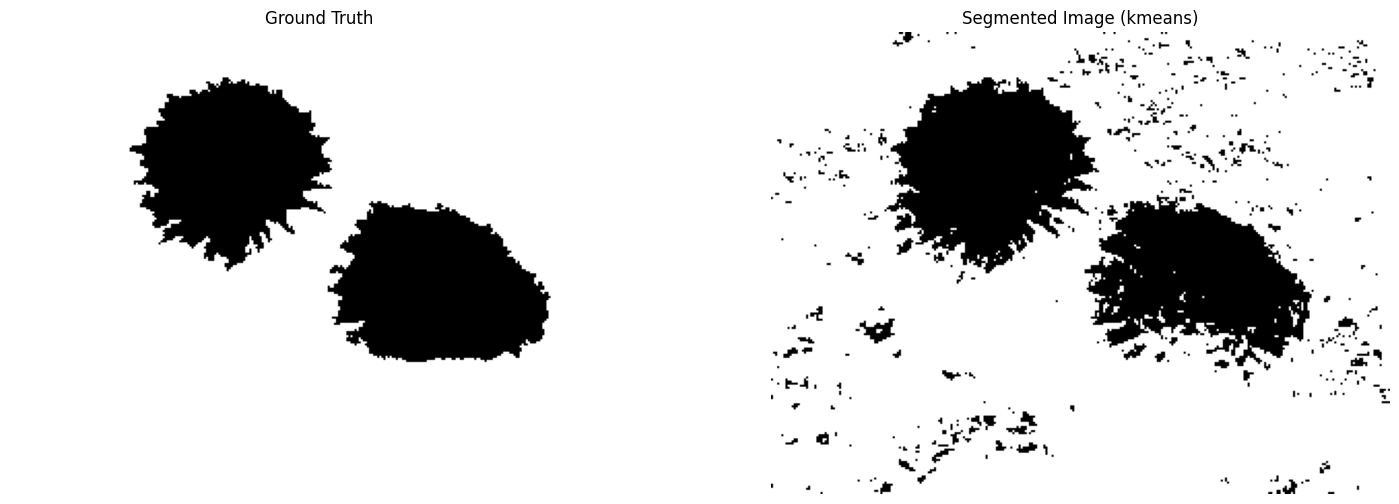

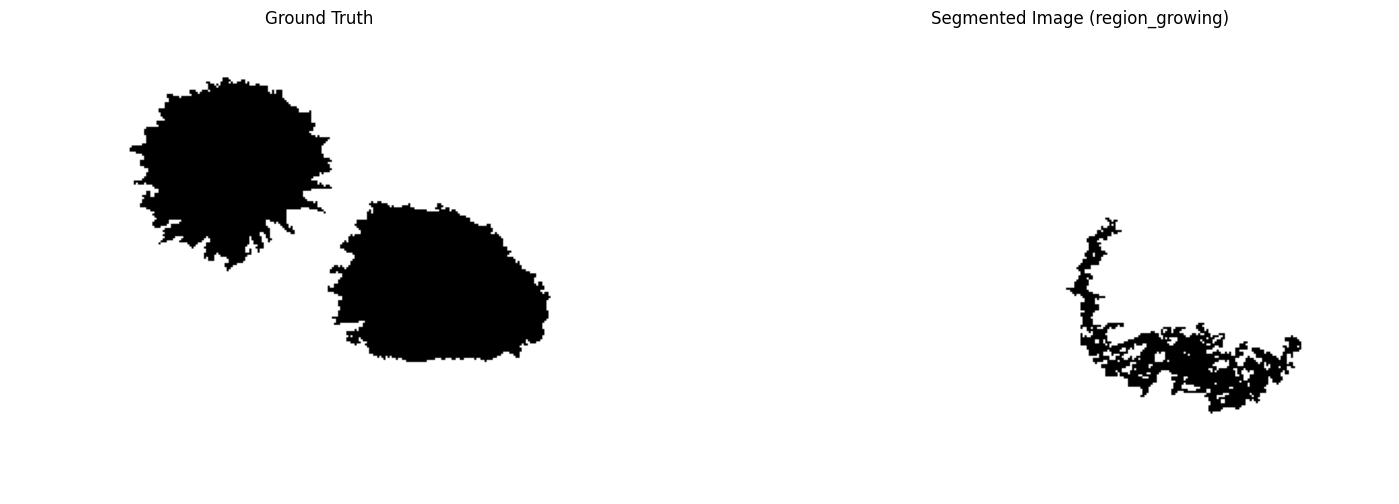

In [191]:
metrics_df=evaluate_segmentation("Datasets/images/textfort/22.png","Datasets/verite_terrain/textfort/22v.png")

In [192]:
metrics_df

Method  Precision    Recall  F1 Score  Accuracy       IoU      Dice
0  otsu_threshold   0.983955  0.956806  0.970191  0.951548  0.942107  0.970191
1          kmeans   0.983955  0.956806  0.970191  0.951548  0.942107  0.970191
2  region_growing   0.826436  0.967135  0.891267  0.805536  0.803860  0.891267

#### Conculsion :


Dans cette analyse, nous avons comparé différentes méthodes de segmentation d'images, y compris le seuil Otsu, K-means et la croissance de régions, en évaluant leur performance à l'aide de métriques telles que la précision, le rappel, le score F1, l'exactitude, l'indice de Jaccard (IoU) et le score Dice. Les résultats montrent que chaque méthode a ses forces et ses faiblesses en fonction du contexte spécifique et des exigences de performance. Le seuil Otsu et K-means ont souvent offert une bonne balance entre précision et rappel, résultant en des scores F1 élevés, ce qui indique une bonne performance globale sur les images traitées. En revanche, la méthode de croissance de régions a excelle en précision dans certains cas mais a souvent eu un rappel plus faible, sauf dans les cas où elle a atteint une précision presque parfaite.